# Présentation du projet

L’ADEME (Agence de l’Environnement et de la Maîtrise de l’Energie) a récemment lancé un appel à manifestation d’intérêt pour promouvoir la réalisation de démonstrateurs et d’expérimentations de nouvelles solutions de mobilité pour les personnes et les marchandises adaptées à différents types de territoires.

Votre structure CesiCDP est déjà bien implantée dans le domaine. Aidé de nombreux partenaires, vous avez réalisé plusieurs études sur le thème de la Mobilité Multimodale Intelligente. Les nouvelles technologies de transport, plus économiques et moins polluantes ne sont pas sans poser de nouveaux défis notamment d’un point de vue de l’optimisation de la gestion des ressources. Mais ces problèmes de logistique du transport présentent un enjeu majeur pour l’avenir : ses applications sont nombreuses (distribution du courrier, livraison de produits, traitement du réseau routier, ramassage des ordures) et leur impact sur
l’environnement peut être véritablement significatif.

Vous faites partie de l’équipe (4 personnes) mise en place par CesiCDP pour répondre à l’appel de l’ADEME. L’enjeu est d’obtenir de nouveaux marchés avec des financements très intéressants pour continuer à développer votre activité.

CesiCDP a décidé d’orienter son étude sur la gestion de tournées de livraison. Le problème algorithmique consiste à calculer sur un réseau routier une tournée permettant de relier entre elles un sous-ensemble de villes, puis de revenir à son point de départ, de manière à minimiser la durée totale de la tournée. Cette optimisation devra tenir compte du trafic prévu sur chaque axe pour les différentes tranches horaires.

L’idée est de proposer une méthode issue de la Recherche Opérationnelle pour générer une tournée de livraison correspondant à ce problème.


### Objectifs

L’objectif de ce problème est de déterminer le meilleur itinéraire sur un réseau routier
pour minimiser la durée totale de la tournée de livraison.


Pour résoudre ce problème nous devons définir les données essentielles :

- Les villes : la représentation des différentes villes dans le réseau routier. Chaque ville est unique. Ces villes peuvent être : un point de livraison, un point de centre de colis ou un point de collecte


- La distance entre les villes : créer une matrice des distances permettant de représenter le temps de parcours entre chaque ville. Ces données peuvent être récupérer à partir de données réelles.


- Les capacités des camions : définir la capacité maximale de chaque camion (poids, volume, objets).


- Les fenêtres de livraisons : chaque point de livraison possède une fenetre de temps durant laquelle les livraisons doivent être effectué (heure de début – heure de fin)


- Le trafic routier : Définir la variation du temps de trajet selon le trafic qui peut différer selon l’horaire.


Il est nécessaire de définir les variables de décision qui permettront de déterminer les choix à effectuer pour la livraison :

- L’organisation des tournées : Définir les différentes tournées effectuées par les camions pour livrés les colis, selon un ordre.


- Les chemins : Définir les chemins empruntés par chaque camion, en spécifiant l’ordre des villes visitées.


- Les horaires de livraison : Choisir une heure de collecte et livraison selon la fenêtre de chaque ville.


Toutefois, nous devons nous soumettre à des contraintes définit dans ce problème :

- Capacité : La quantité d’objet ne doit pas dépasser la capacité maximale (objets / poids / volume)


- Trajet : Les chemins doivent être accessibles aux camions et soumis au code de la route (respect de la limitation de vitesse)


- Temps : les livraisons doivent être effectués en temps et en heure


- Livraisons spécifiques : certains camions doivent livrées des objets que d’autres ne peuvent pas.


- Trafic : Ajuster les horaires de livraison en fonction du temps de parcours et du trafic routier.


Après avoir définit l’ensemble de ces priorités théorique, nous pouvons proposer une modélisation de notre problème de gestion de tournées de livraison selon les attentes de l’ADEME.

# Modélisation

### Contraintes

Nous avons choisi la contrainte suivante :

**Le temps de parcours d’une arête varie au cours du temps (ce qui revient à faire varier sa longueur), pour représenter la variation du trafic**.

Nous allons utiliser une dimension temps qui permettra de faire varier le trafic à des heures données. Cela va permettre de retourner un graphe modifié selon la variation du trafic.

Afin de modéliser notre problème, nous avons formulé un problème de décision ainsi qu'un problème d'optimisation. Notre problème consiste à trouver le plus court chemin en partant d'un point pour ensuite revenir à ce même point, en passant une seule fois par chaque point. Notre problème est donc assimilable au **problème du voyageur de commerce**. Nous pouvons donc écrire les problème de décision et d'optimisation suivants:

## Problème de décision

`Données : un graphe complet G = (V,A,ω) avec V un ensemble de sommets, A un ensemble d'arrètes et ω : A -> N qui est une fonction de coût sur les arêtes et enfin un entier k
Question : Existe-t-il un cycle passant une et une seule fois par chaque sommet tel que la somme des coûts des arcs utilisés soit inférieure à k ?`


## Problème d'optimisation

`Données : un graphe complet G = (V,A,ω) avec V un ensemble de sommets, A un ensemble d'arrètes et ω : A -> N qui est une fonction de coût sur les arêtes et enfin un entier k
Question : Quelle est la plus petite valeur de k pour laquelle la réponse au problème de décision est oui?
`

Nous pouvons donc illustrer notre problème de la façon suivante (exemple avec la région Grand Est) :

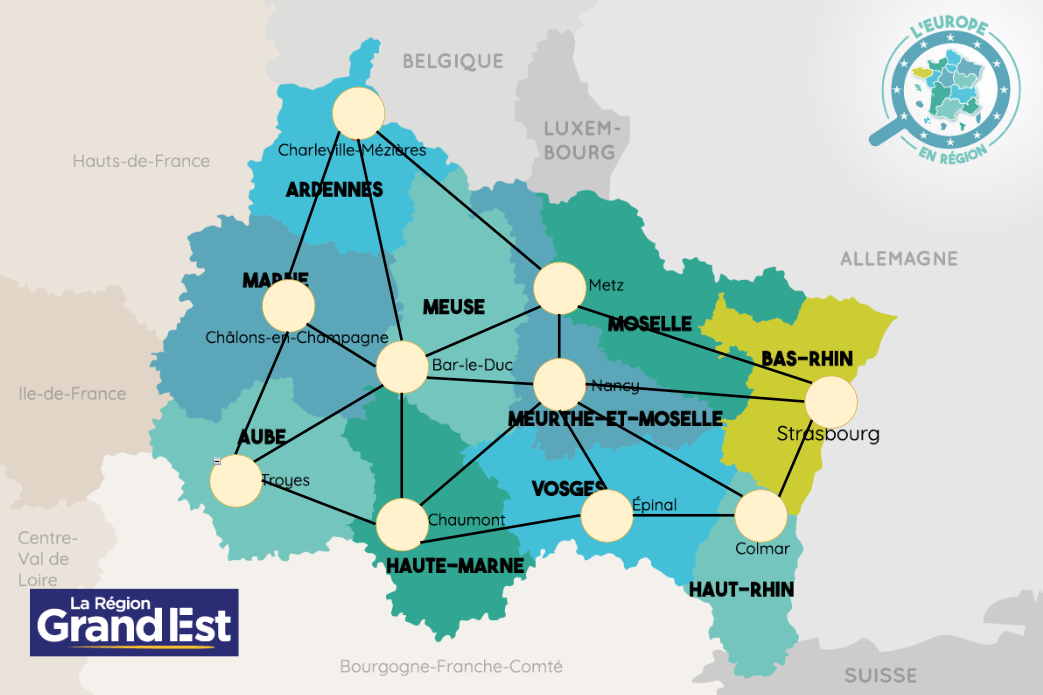

Chaque ville sont reliés entre elles, chaque arrête représente un trajet unique de distance prédéfinis, nous pouvons utiliser pour cela des distances réels entre les différentes villes.

**Les paramètres de nos données sont les suivantes :**

k : camions disponible simultanément pour effectuer les livraisons

K : l’ensemble des camions soit K = {1, 2, 3, ..., k}

n : le nombre de villes

N : l’ensemble des villes soit N = {1, 2, 3, ..., n}

m : le nombre de colis à livrer 

M : l'ensemble des colis à livrer, soit M = {1, 2, 3, ..., m}

V : l'ensemble des nœuds possible

A : l'ensemble des arrêtes

t(i,j) : temps du trajet (i,j -> trajet entre i-> j)

C: capacité du camion

l : l'ensemble des volumes de colis

S : nombre de colis à livrer

p : variable booléene pour informer si une arête a été parcourue.

### Variable de décision

### Contraintes du programme

### Fonction économique

### Programme Linéaire

## Complexité de l'algorithme

De nombreux algorithmes permettent de résoudre le problème du voyageur de commerce de manière optimale. Nous pouvons en lister quelques un :

- Le type **force brute** : c'est un programme qui réalise tous les chemins possibles afin de connaitre le chemin le plus optimal. Sa complexité est factorielle O(n!).  


- Le type **programmation dynamique** : cela consiste à diviser le problème à résoudre en sous-problèmes et à stocker les résultats de ces sous-problèmes afin de reconstruire la solution du problème initial. En programmation dynamique, le stockage des résultats intermédiaires permet d'optimiser la résolution du problème puisque cela évite le recalcul de la solution à chaque fois. Sa complexité temporelle est exponentielle O(e<sup>n</sup>).  


- Le type **branch and bound** : L’algorithme branch-and-bound explore l’arbre des possibilités (dans le cas du voyageur de commerce l’arbre des chemins possibles). Il utilise pour cela un parcours en largeur (Dijkstra sur un graphe pondéré). À chaque nœud qu’il rencontre, il cherche à estimer un intervalle aussi étroit que possible estimant la longueur d’un plus court chemin obtenu à partir de la branche de l’arbre où nous sommes. Sa complexité est exponentielle O(e<sup>n</sup>)

## Démonstration de son NP-Complétude

### Appartenance à NP

Pour montrer que notre problème est dans NP, nous allons d'abord vérifier si un certificat (une solution au problème) peut être vérifier en temps polynomial.  

Etant donné une suite de sommets, nous vérifions :  

- Si cette suite de sommets est bien un circuit c'est-à-dire que l'on parcourt bien les sommets de proche en proche (chaque sommet doit être voisin du sommet précédent) : **cette vérification se fait en temps linéaire O(N)**  


- Si on passe une fois par chaque sommet : **cette vérification se fait en temps linéraire O(N)**  


- Si le coût du circuit est inférieur à k : on fait la somme des poids des arêtes parcourues puis on vérifie si elle est inférieur à k : **cette vérification se fait en temps constant O(1)**  



La vérification de la solution se fait donc en temps linéaire, donc en temps polynomial. Notre problème appartient à **NP**.

### Appartenance à NP-Complet

Nous effectuons une réduction polynomiale afin de rattacher notre problème à un autre problème que l'on sait NP-Complet. Nous allons donc réduire le problème du voyageur de commerce au **Cycle Hamiltonien**. On sait que Cycle Hamiltonien est NP-Complet.  

On pose alors une instance de cycle hamiltonien G=(V,E), un graphe G complet avec un ensemble de sommets V et un ensemble d'arêtes E. (Rajouter des arêtes pour rendre le graphe complet est de complexité O(n(n-1))).


On construit alors une instance du problème du voyageur de commerce en posant :


$$
\left\{
    \begin{array}{ll}
        c(i,j) = 0 & \mbox{si } (i,j) \in E \\
        1 & \mbox{sinon.}
    \end{array}
\right.
$$


L'instance du voyageur de commerce est alors (G,c,0): en effet, si nous avons un cycle hamiltonien dans G, ce cycle correspond bien à un cycle de coût 0 pour le problème du voyageur de commerce. Et si le problème du voyageur de commerce admet un cycle de coût nul alors c'est un cycle hamiltonien. 


Notre problème est donc au moins plus difficile que cycle hamiltonien. Donc notre problème est NP-Complet et par extension NP-Difficile.

## Bibliographie

http://formations.telecom-bretagne.eu/pyrat/?p=824  
https://math.unice.fr/~pauly/Little.pdf